In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
dataset = pd.read_csv('/diabetes2.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = dataset[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dataset['Outcome']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
predictions = logistic.predict(X_test)

In [8]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       142
           1       0.75      0.49      0.59        89

    accuracy                           0.74       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


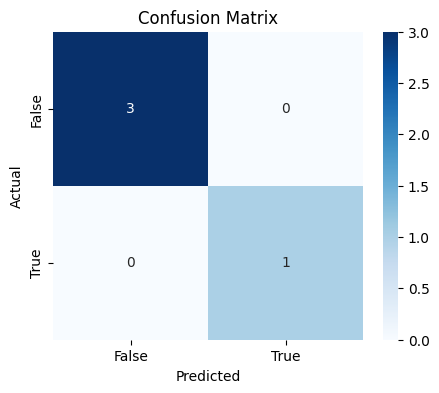

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Compute and display performance metrics
cm = confusion_matrix(y_train, predictions)
accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)
f1 = f1_score(y_train, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = len(y)
        h = self.sigmoid(X.dot(self.theta))
        cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def gradient_descent(self, X, y):
        m = len(y)
        for _ in range(self.epochs):
            h = self.sigmoid(X.dot(self.theta))
            gradient = (1/m) * X.T.dot(h - y)
            self.theta -= self.learning_rate * gradient
            cost = self.compute_cost(X, y)  # Compute cost at each iteration
            print(f"Epoch {_+1}/{self.epochs}, Cost: {cost}")

    def fit(self, X, y):
        m, n = X.shape
        X = np.c_[np.ones(m), X]  # Add bias term
        self.theta = np.zeros(n + 1)
        self.gradient_descent(X, y)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        probabilities = self.sigmoid(X.dot(self.theta))
        return (probabilities >= 0.5).astype(int)

if __name__ == "__main__":

    X = dataset[['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
    y = dataset['Outcome']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    model = LogisticRegressionGD(learning_rate=0.1, epochs=1000)
    model.fit(X_train, y_train)

    predictions = model.predict(X_train)
    print("Predictions:", predictions)
    print("Final Weights (Theta):", model.theta)


<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp

Epoch 1/1000, Cost: inf
Epoch 2/1000, Cost: inf
Epoch 3/1000, Cost: inf
Epoch 4/1000, Cost: inf
Epoch 5/1000, Cost: inf
Epoch 6/1000, Cost: inf
Epoch 7/1000, Cost: inf
Epoch 8/1000, Cost: inf
Epoch 9/1000, Cost: inf
Epoch 10/1000, Cost: inf
Epoch 11/1000, Cost: inf
Epoch 12/1000, Cost: inf
Epoch 13/1000, Cost: inf
Epoch 14/1000, Cost: inf
Epoch 15/1000, Cost: inf
Epoch 16/1000, Cost: inf
Epoch 17/1000, Cost: inf
Epoch 18/1000, Cost: inf
Epoch 19/1000, Cost: inf
Epoch 20/1000, Cost: inf
Epoch 21/1000, Cost: inf
Epoch 22/1000, Cost: inf
Epoch 23/1000, Cost: inf
Epoch 24/1000, Cost: inf
Epoch 25/1000, Cost: inf
Epoch 26/1000, Cost: inf
Epoch 27/1000, Cost: inf
Epoch 28/1000, Cost: inf
Epoch 29/1000, Cost: inf
Epoch 30/1000, Cost: inf
Epoch 31/1000, Cost: inf
Epoch 32/1000, Cost: inf
Epoch 33/1000, Cost: inf
Epoch 34/1000, Cost: inf
Epoch 35/1000, Cost: inf
Epoch 36/1000, Cost: inf
Epoch 37/1000, Cost: inf
Epoch 38/1000, Cost: inf
Epoch 39/1000, Cost: inf
Epoch 40/1000, Cost: inf
Epoch 41/

<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * 


Epoch 165/1000, Cost: inf
Epoch 166/1000, Cost: inf
Epoch 167/1000, Cost: inf
Epoch 168/1000, Cost: inf
Epoch 169/1000, Cost: inf
Epoch 170/1000, Cost: inf
Epoch 171/1000, Cost: inf
Epoch 172/1000, Cost: inf
Epoch 173/1000, Cost: inf
Epoch 174/1000, Cost: inf
Epoch 175/1000, Cost: inf
Epoch 176/1000, Cost: inf
Epoch 177/1000, Cost: inf
Epoch 178/1000, Cost: inf
Epoch 179/1000, Cost: inf
Epoch 180/1000, Cost: inf
Epoch 181/1000, Cost: inf
Epoch 182/1000, Cost: inf
Epoch 183/1000, Cost: inf
Epoch 184/1000, Cost: inf
Epoch 185/1000, Cost: inf
Epoch 186/1000, Cost: inf
Epoch 187/1000, Cost: inf
Epoch 188/1000, Cost: inf
Epoch 189/1000, Cost: inf
Epoch 190/1000, Cost: inf
Epoch 191/1000, Cost: inf
Epoch 192/1000, Cost: inf
Epoch 193/1000, Cost: inf
Epoch 194/1000, Cost: inf
Epoch 195/1000, Cost: inf
Epoch 196/1000, Cost: inf
Epoch 197/1000, Cost: inf
Epoch 198/1000, Cost: inf
Epoch 199/1000, Cost: inf
Epoch 200/1000, Cost: inf
Epoch 201/1000, Cost: inf
Epoch 202/1000, Cost: inf
Epoch 203/1

<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow e

Epoch 241/1000, Cost: inf
Epoch 242/1000, Cost: inf
Epoch 243/1000, Cost: inf
Epoch 244/1000, Cost: inf
Epoch 245/1000, Cost: inf
Epoch 246/1000, Cost: inf
Epoch 247/1000, Cost: inf
Epoch 248/1000, Cost: inf
Epoch 249/1000, Cost: inf
Epoch 250/1000, Cost: inf
Epoch 251/1000, Cost: inf
Epoch 252/1000, Cost: inf
Epoch 253/1000, Cost: inf
Epoch 254/1000, Cost: inf
Epoch 255/1000, Cost: inf
Epoch 256/1000, Cost: inf
Epoch 257/1000, Cost: inf
Epoch 258/1000, Cost: inf
Epoch 259/1000, Cost: inf
Epoch 260/1000, Cost: inf
Epoch 261/1000, Cost: inf
Epoch 262/1000, Cost: inf
Epoch 263/1000, Cost: inf
Epoch 264/1000, Cost: inf
Epoch 265/1000, Cost: inf
Epoch 266/1000, Cost: inf
Epoch 267/1000, Cost: inf
Epoch 268/1000, Cost: inf
Epoch 269/1000, Cost: inf
Epoch 270/1000, Cost: inf
Epoch 271/1000, Cost: inf
Epoch 272/1000, Cost: inf
Epoch 273/1000, Cost: inf
Epoch 274/1000, Cost: inf
Epoch 275/1000, Cost: inf
Epoch 276/1000, Cost: inf
Epoch 277/1000, Cost: inf
Epoch 278/1000, Cost: inf
Epoch 279/10

<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by 


Epoch 318/1000, Cost: inf
Epoch 319/1000, Cost: inf
Epoch 320/1000, Cost: inf
Epoch 321/1000, Cost: inf
Epoch 322/1000, Cost: inf
Epoch 323/1000, Cost: inf
Epoch 324/1000, Cost: inf
Epoch 325/1000, Cost: inf
Epoch 326/1000, Cost: inf
Epoch 327/1000, Cost: inf
Epoch 328/1000, Cost: inf
Epoch 329/1000, Cost: inf
Epoch 330/1000, Cost: inf
Epoch 331/1000, Cost: inf
Epoch 332/1000, Cost: inf
Epoch 333/1000, Cost: inf
Epoch 334/1000, Cost: inf
Epoch 335/1000, Cost: inf
Epoch 336/1000, Cost: inf
Epoch 337/1000, Cost: inf
Epoch 338/1000, Cost: inf
Epoch 339/1000, Cost: inf
Epoch 340/1000, Cost: inf
Epoch 341/1000, Cost: inf
Epoch 342/1000, Cost: inf
Epoch 343/1000, Cost: inf
Epoch 344/1000, Cost: inf
Epoch 345/1000, Cost: inf
Epoch 346/1000, Cost: inf
Epoch 347/1000, Cost: inf
Epoch 348/1000, Cost: inf
Epoch 349/1000, Cost: inf
Epoch 350/1000, Cost: inf
Epoch 351/1000, Cost: inf
Epoch 352/1000, Cost: inf
Epoch 353/1000, Cost: inf
Epoch 354/1000, Cost: inf
Epoch 355/1000, Cost: inf
Epoch 356/1

<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * 

Epoch 389/1000, Cost: inf
Epoch 390/1000, Cost: inf
Epoch 391/1000, Cost: inf
Epoch 392/1000, Cost: inf
Epoch 393/1000, Cost: inf
Epoch 394/1000, Cost: inf
Epoch 395/1000, Cost: inf
Epoch 396/1000, Cost: inf
Epoch 397/1000, Cost: inf
Epoch 398/1000, Cost: inf
Epoch 399/1000, Cost: inf
Epoch 400/1000, Cost: inf
Epoch 401/1000, Cost: inf
Epoch 402/1000, Cost: inf
Epoch 403/1000, Cost: inf
Epoch 404/1000, Cost: inf
Epoch 405/1000, Cost: inf
Epoch 406/1000, Cost: inf
Epoch 407/1000, Cost: inf
Epoch 408/1000, Cost: inf
Epoch 409/1000, Cost: inf
Epoch 410/1000, Cost: inf
Epoch 411/1000, Cost: inf
Epoch 412/1000, Cost: inf
Epoch 413/1000, Cost: inf
Epoch 414/1000, Cost: inf
Epoch 415/1000, Cost: inf
Epoch 416/1000, Cost: inf
Epoch 417/1000, Cost: inf
Epoch 418/1000, Cost: inf
Epoch 419/1000, Cost: inf
Epoch 420/1000, Cost: inf
Epoch 421/1000, Cost: inf
Epoch 422/1000, Cost: inf
Epoch 423/1000, Cost: inf
Epoch 424/1000, Cost: inf
Epoch 425/1000, Cost: inf
Epoch 426/1000, Cost: inf
Epoch 427/10

<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * 

Epoch 472/1000, Cost: inf
Epoch 473/1000, Cost: inf
Epoch 474/1000, Cost: inf
Epoch 475/1000, Cost: inf
Epoch 476/1000, Cost: inf
Epoch 477/1000, Cost: inf
Epoch 478/1000, Cost: inf
Epoch 479/1000, Cost: inf
Epoch 480/1000, Cost: inf
Epoch 481/1000, Cost: inf
Epoch 482/1000, Cost: inf
Epoch 483/1000, Cost: inf
Epoch 484/1000, Cost: inf
Epoch 485/1000, Cost: inf
Epoch 486/1000, Cost: inf
Epoch 487/1000, Cost: inf
Epoch 488/1000, Cost: inf
Epoch 489/1000, Cost: inf
Epoch 490/1000, Cost: inf
Epoch 491/1000, Cost: inf
Epoch 492/1000, Cost: inf
Epoch 493/1000, Cost: inf
Epoch 494/1000, Cost: inf
Epoch 495/1000, Cost: inf
Epoch 496/1000, Cost: inf
Epoch 497/1000, Cost: inf
Epoch 498/1000, Cost: inf
Epoch 499/1000, Cost: inf
Epoch 500/1000, Cost: inf
Epoch 501/1000, Cost: inf
Epoch 502/1000, Cost: inf
Epoch 503/1000, Cost: inf
Epoch 504/1000, Cost: inf
Epoch 505/1000, Cost: inf
Epoch 506/1000, Cost: inf
Epoch 507/1000, Cost: inf
Epoch 508/1000, Cost: inf
Epoch 509/1000, Cost: inf
Epoch 510/10

<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * 

Epoch 553/1000, Cost: inf
Epoch 554/1000, Cost: inf
Epoch 555/1000, Cost: inf
Epoch 556/1000, Cost: inf
Epoch 557/1000, Cost: inf
Epoch 558/1000, Cost: inf
Epoch 559/1000, Cost: inf
Epoch 560/1000, Cost: inf
Epoch 561/1000, Cost: inf
Epoch 562/1000, Cost: inf
Epoch 563/1000, Cost: inf
Epoch 564/1000, Cost: inf
Epoch 565/1000, Cost: inf
Epoch 566/1000, Cost: inf
Epoch 567/1000, Cost: inf
Epoch 568/1000, Cost: inf
Epoch 569/1000, Cost: inf
Epoch 570/1000, Cost: inf
Epoch 571/1000, Cost: inf
Epoch 572/1000, Cost: inf
Epoch 573/1000, Cost: inf
Epoch 574/1000, Cost: inf
Epoch 575/1000, Cost: inf
Epoch 576/1000, Cost: inf
Epoch 577/1000, Cost: inf
Epoch 578/1000, Cost: inf
Epoch 579/1000, Cost: inf
Epoch 580/1000, Cost: inf
Epoch 581/1000, Cost: inf
Epoch 582/1000, Cost: inf
Epoch 583/1000, Cost: inf
Epoch 584/1000, Cost: inf
Epoch 585/1000, Cost: inf
Epoch 586/1000, Cost: inf
Epoch 587/1000, Cost: inf
Epoch 588/1000, Cost: inf
Epoch 589/1000, Cost: inf
Epoch 590/1000, Cost: inf
Epoch 591/10

<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow e

Epoch 629/1000, Cost: inf
Epoch 630/1000, Cost: inf
Epoch 631/1000, Cost: inf
Epoch 632/1000, Cost: inf
Epoch 633/1000, Cost: inf
Epoch 634/1000, Cost: inf
Epoch 635/1000, Cost: inf
Epoch 636/1000, Cost: inf
Epoch 637/1000, Cost: inf
Epoch 638/1000, Cost: inf
Epoch 639/1000, Cost: inf
Epoch 640/1000, Cost: inf
Epoch 641/1000, Cost: inf
Epoch 642/1000, Cost: inf
Epoch 643/1000, Cost: inf
Epoch 644/1000, Cost: inf
Epoch 645/1000, Cost: inf
Epoch 646/1000, Cost: inf
Epoch 647/1000, Cost: inf
Epoch 648/1000, Cost: inf
Epoch 649/1000, Cost: inf
Epoch 650/1000, Cost: inf
Epoch 651/1000, Cost: inf
Epoch 652/1000, Cost: inf
Epoch 653/1000, Cost: inf
Epoch 654/1000, Cost: inf
Epoch 655/1000, Cost: inf
Epoch 656/1000, Cost: inf
Epoch 657/1000, Cost: inf
Epoch 658/1000, Cost: inf
Epoch 659/1000, Cost: inf
Epoch 660/1000, Cost: inf
Epoch 661/1000, Cost: inf
Epoch 662/1000, Cost: inf
Epoch 663/1000, Cost: inf
Epoch 664/1000, Cost: inf
Epoch 665/1000, Cost: inf
Epoch 666/1000, Cost: inf
Epoch 667/10

<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow e

Epoch 706/1000, Cost: inf
Epoch 707/1000, Cost: inf
Epoch 708/1000, Cost: inf
Epoch 709/1000, Cost: inf
Epoch 710/1000, Cost: inf
Epoch 711/1000, Cost: inf
Epoch 712/1000, Cost: inf
Epoch 713/1000, Cost: inf
Epoch 714/1000, Cost: inf
Epoch 715/1000, Cost: inf
Epoch 716/1000, Cost: inf
Epoch 717/1000, Cost: inf
Epoch 718/1000, Cost: inf
Epoch 719/1000, Cost: inf
Epoch 720/1000, Cost: inf
Epoch 721/1000, Cost: inf
Epoch 722/1000, Cost: inf
Epoch 723/1000, Cost: inf
Epoch 724/1000, Cost: inf
Epoch 725/1000, Cost: inf
Epoch 726/1000, Cost: inf
Epoch 727/1000, Cost: inf
Epoch 728/1000, Cost: inf
Epoch 729/1000, Cost: inf
Epoch 730/1000, Cost: inf
Epoch 731/1000, Cost: inf
Epoch 732/1000, Cost: inf
Epoch 733/1000, Cost: inf
Epoch 734/1000, Cost: inf
Epoch 735/1000, Cost: inf
Epoch 736/1000, Cost: inf
Epoch 737/1000, Cost: inf
Epoch 738/1000, Cost: inf
Epoch 739/1000, Cost: inf
Epoch 740/1000, Cost: inf
Epoch 741/1000, Cost: inf
Epoch 742/1000, Cost: inf
Epoch 743/1000, Cost: inf
Epoch 744/10

<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * 

Epoch 785/1000, Cost: inf
Epoch 786/1000, Cost: inf
Epoch 787/1000, Cost: inf
Epoch 788/1000, Cost: inf
Epoch 789/1000, Cost: inf
Epoch 790/1000, Cost: inf
Epoch 791/1000, Cost: inf
Epoch 792/1000, Cost: inf
Epoch 793/1000, Cost: inf
Epoch 794/1000, Cost: inf
Epoch 795/1000, Cost: inf
Epoch 796/1000, Cost: inf
Epoch 797/1000, Cost: inf
Epoch 798/1000, Cost: inf
Epoch 799/1000, Cost: inf
Epoch 800/1000, Cost: inf
Epoch 801/1000, Cost: inf
Epoch 802/1000, Cost: inf
Epoch 803/1000, Cost: inf
Epoch 804/1000, Cost: inf
Epoch 805/1000, Cost: inf
Epoch 806/1000, Cost: inf
Epoch 807/1000, Cost: inf
Epoch 808/1000, Cost: inf
Epoch 809/1000, Cost: inf
Epoch 810/1000, Cost: inf
Epoch 811/1000, Cost: inf
Epoch 812/1000, Cost: inf
Epoch 813/1000, Cost: inf
Epoch 814/1000, Cost: inf
Epoch 815/1000, Cost: inf
Epoch 816/1000, Cost: inf
Epoch 817/1000, Cost: inf
Epoch 818/1000, Cost: inf
Epoch 819/1000, Cost: inf
Epoch 820/1000, Cost: inf
Epoch 821/1000, Cost: inf
Epoch 822/1000, Cost: inf
Epoch 823/10

<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * 

Epoch 865/1000, Cost: inf
Epoch 866/1000, Cost: inf
Epoch 867/1000, Cost: inf
Epoch 868/1000, Cost: inf
Epoch 869/1000, Cost: inf
Epoch 870/1000, Cost: inf
Epoch 871/1000, Cost: inf
Epoch 872/1000, Cost: inf
Epoch 873/1000, Cost: inf
Epoch 874/1000, Cost: inf
Epoch 875/1000, Cost: inf
Epoch 876/1000, Cost: inf
Epoch 877/1000, Cost: inf
Epoch 878/1000, Cost: inf
Epoch 879/1000, Cost: inf
Epoch 880/1000, Cost: inf
Epoch 881/1000, Cost: inf
Epoch 882/1000, Cost: inf
Epoch 883/1000, Cost: inf
Epoch 884/1000, Cost: inf
Epoch 885/1000, Cost: inf
Epoch 886/1000, Cost: inf
Epoch 887/1000, Cost: inf
Epoch 888/1000, Cost: inf
Epoch 889/1000, Cost: inf
Epoch 890/1000, Cost: inf
Epoch 891/1000, Cost: inf
Epoch 892/1000, Cost: inf
Epoch 893/1000, Cost: inf
Epoch 894/1000, Cost: inf
Epoch 895/1000, Cost: inf
Epoch 896/1000, Cost: inf
Epoch 897/1000, Cost: inf
Epoch 898/1000, Cost: inf
Epoch 899/1000, Cost: inf
Epoch 900/1000, Cost: inf
Epoch 901/1000, Cost: inf
Epoch 902/1000, Cost: inf
Epoch 903/10

<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow e

Epoch 942/1000, Cost: inf
Epoch 943/1000, Cost: inf
Epoch 944/1000, Cost: inf
Epoch 945/1000, Cost: inf
Epoch 946/1000, Cost: inf
Epoch 947/1000, Cost: inf
Epoch 948/1000, Cost: inf
Epoch 949/1000, Cost: inf
Epoch 950/1000, Cost: inf
Epoch 951/1000, Cost: inf
Epoch 952/1000, Cost: inf
Epoch 953/1000, Cost: inf
Epoch 954/1000, Cost: inf
Epoch 955/1000, Cost: inf
Epoch 956/1000, Cost: inf
Epoch 957/1000, Cost: inf
Epoch 958/1000, Cost: inf
Epoch 959/1000, Cost: inf
Epoch 960/1000, Cost: inf
Epoch 961/1000, Cost: inf
Epoch 962/1000, Cost: inf
Epoch 963/1000, Cost: inf
Epoch 964/1000, Cost: inf
Epoch 965/1000, Cost: inf
Epoch 966/1000, Cost: inf
Epoch 967/1000, Cost: inf
Epoch 968/1000, Cost: inf
Epoch 969/1000, Cost: inf
Epoch 970/1000, Cost: inf
Epoch 971/1000, Cost: inf
Epoch 972/1000, Cost: inf
Epoch 973/1000, Cost: inf
Epoch 974/1000, Cost: inf
Epoch 975/1000, Cost: inf
Epoch 976/1000, Cost: inf
Epoch 977/1000, Cost: inf
Epoch 978/1000, Cost: inf
Epoch 979/1000, Cost: inf
Epoch 980/10

<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-18-3f7cc2279fc2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-18-3f7cc2279fc2>:16: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * 